In [414]:
#1: Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

#nltk.download('vader_lexicon')
#nltk.download('stopwords')

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [415]:
#2: Authentication for Twitter API
#read the twitter config file. Upload your own twitter developer credentials.
config = pd.read_csv("twitter_config.csv")

# Variables that contains the credentials to access Twitter API
twitter_key = config['twitter_key'][0]
twitter_secret = config['twitter_secret'][0]
twitter_access_token = config['twitter_access_token'][0]
twitter_access_token_secret = config['twitter_access_token_secret'][0]

auth = tweepy.OAuthHandler(twitter_key, twitter_secret)
auth.set_access_token(twitter_access_token, twitter_access_token_secret)
api = tweepy.API(auth)

In [416]:
#3: Enter the keyword or hashtag and the number of tweets to be analyzed.

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: iphone 12
Please enter how many tweets to analyze: 1000


In [417]:
#Calculating number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  134
negative number:  72
neutral number:  794


In [418]:
tweet_list

,0
0,RT @srkninci: 2020 zor bir yıldı.\n\nYılbaşınd...
1,RT @chirawitchris: #แจกฟรี Iphone 12 Pro Max ส...
2,RT @LewLater: iPhone 12 Teardown Reveals Apple...
3,RT @TheBubSauce: Enter our Gold iPhone 12 Pro ...
4,@TechnicalGuruji Iphone 12 ka Giveaway kab hai...
...,...
995,RT @chirawitchris: #แจกฟรี Iphone 12 Pro Max ส...
996,RT @srkninci: 2020 zor bir yıldı.\n\nYılbaşınd...
997,iPhoneの共有メニューに表示される「連絡先」をオフにする方法、うっかり送信しないためにも...
998,Pay your bills or send money using our Interne...


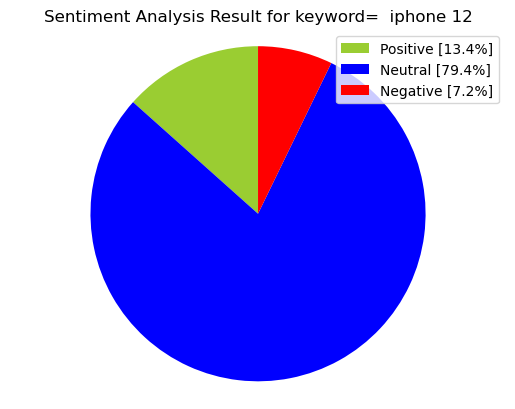

In [419]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [420]:
tweet_list.drop_duplicates(inplace = True) 
tweet_list

,0
0,RT @srkninci: 2020 zor bir yıldı.\n\nYılbaşınd...
1,RT @chirawitchris: #แจกฟรี Iphone 12 Pro Max ส...
2,RT @LewLater: iPhone 12 Teardown Reveals Apple...
3,RT @TheBubSauce: Enter our Gold iPhone 12 Pro ...
4,@TechnicalGuruji Iphone 12 ka Giveaway kab hai...
...,...
990,Do you still want iPhone 12? Just asking for s...
991,This DSF get amazing Offers &amp; Win Fabulous...
992,« Bienvenue sur l’iPhone 12 Pro Max »
997,iPhoneの共有メニューに表示される「連絡先」をオフにする方法、うっかり送信しないためにも...


In [421]:
#tw_list = pd.DataFrame(tweet_list)
#tw_list["text"] = tw_list[0]
#tw_list

In [422]:
# 4: Cleaning Tweets to Analyse Sentiment
#Cleaning Text (RT, Punctuation, lowercase)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @srkninci: 2020 zor bir yıldı.\n\nYılbaşınd...,2020 zor bir y ld y lba nda ekili le 2 a...
1,RT @chirawitchris: #แจกฟรี Iphone 12 Pro Max ส...,iphone 12 pro max 128g 1 ...
2,RT @LewLater: iPhone 12 Teardown Reveals Apple...,iphone 12 teardown reveals apple s tactics ...
3,RT @TheBubSauce: Enter our Gold iPhone 12 Pro ...,enter our gold iphone 12 pro 512gb giveaway b...
4,@TechnicalGuruji Iphone 12 ka Giveaway kab hai...,iphone 12 ka giveaway kab hai aur wo mu...
5,RT @Oye_Sunoo: جس کو بھی IPHONE 12 چاھیے مجھے ...,iphone 12 100fr...
6,@teruuushima @MlSASKl @captainteruu Itu artiny...,itu artinya minta ps5 sama iphone 12
7,RT @Yodobashi_X: ／\n格安SIM J:COMモバイル がついに📱\n＼\n...,sim j com 9 j com ...
8,RT @SubjectKpop: Nayeon want to get iPhone 12 ...,nayeon want to get iphone 12 mini but she hav...
11,RT @ForLinkin: More iPhone 12 series in stock👍...,more iphone 12 series in stock nokia yam ph...


In [423]:
#5: Analysing the sentiment
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @srkninci: 2020 zor bir yıldı.\n\nYılbaşınd...,2020 zor bir y ld y lba nda ekili le 2 a...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @chirawitchris: #แจกฟรี Iphone 12 Pro Max ส...,iphone 12 pro max 128g 1 ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,RT @LewLater: iPhone 12 Teardown Reveals Apple...,iphone 12 teardown reveals apple s tactics ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,RT @TheBubSauce: Enter our Gold iPhone 12 Pro ...,enter our gold iphone 12 pro 512gb giveaway b...,-0.500000,0.500000,positive,0.000,0.858,0.142,0.5859
4,@TechnicalGuruji Iphone 12 ka Giveaway kab hai...,iphone 12 ka giveaway kab hai aur wo mu...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @Oye_Sunoo: جس کو بھی IPHONE 12 چاھیے مجھے ...,iphone 12 100fr...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
6,@teruuushima @MlSASKl @captainteruu Itu artiny...,itu artinya minta ps5 sama iphone 12,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,RT @Yodobashi_X: ／\n格安SIM J:COMモバイル がついに📱\n＼\n...,sim j com 9 j com ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
8,RT @SubjectKpop: Nayeon want to get iPhone 12 ...,nayeon want to get iphone 12 mini but she hav...,0.000000,0.400000,negative,0.108,0.848,0.044,-0.3919
11,RT @ForLinkin: More iPhone 12 series in stock👍...,more iphone 12 series in stock nokia yam ph...,0.416667,0.516667,positive,0.000,0.881,0.119,0.3182


In [424]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [425]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [426]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,300,68.97
positive,99,22.76
negative,36,8.28


In [427]:
# create data for Pie Chart
#pichart = count_values_in_column(tw_list,"sentiment")
#names= pc.index
#size=pc["Percentage"]
 
# Create a circle for the center of the plot
#my_circle=plt.Circle( (0,0), 0.7, color='white')
#plt.pie(size, labels=names, colors=['green','blue','red'])
#p=plt.gcf()
#p.gca().add_artist(my_circle)
#plt.show()

In [428]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


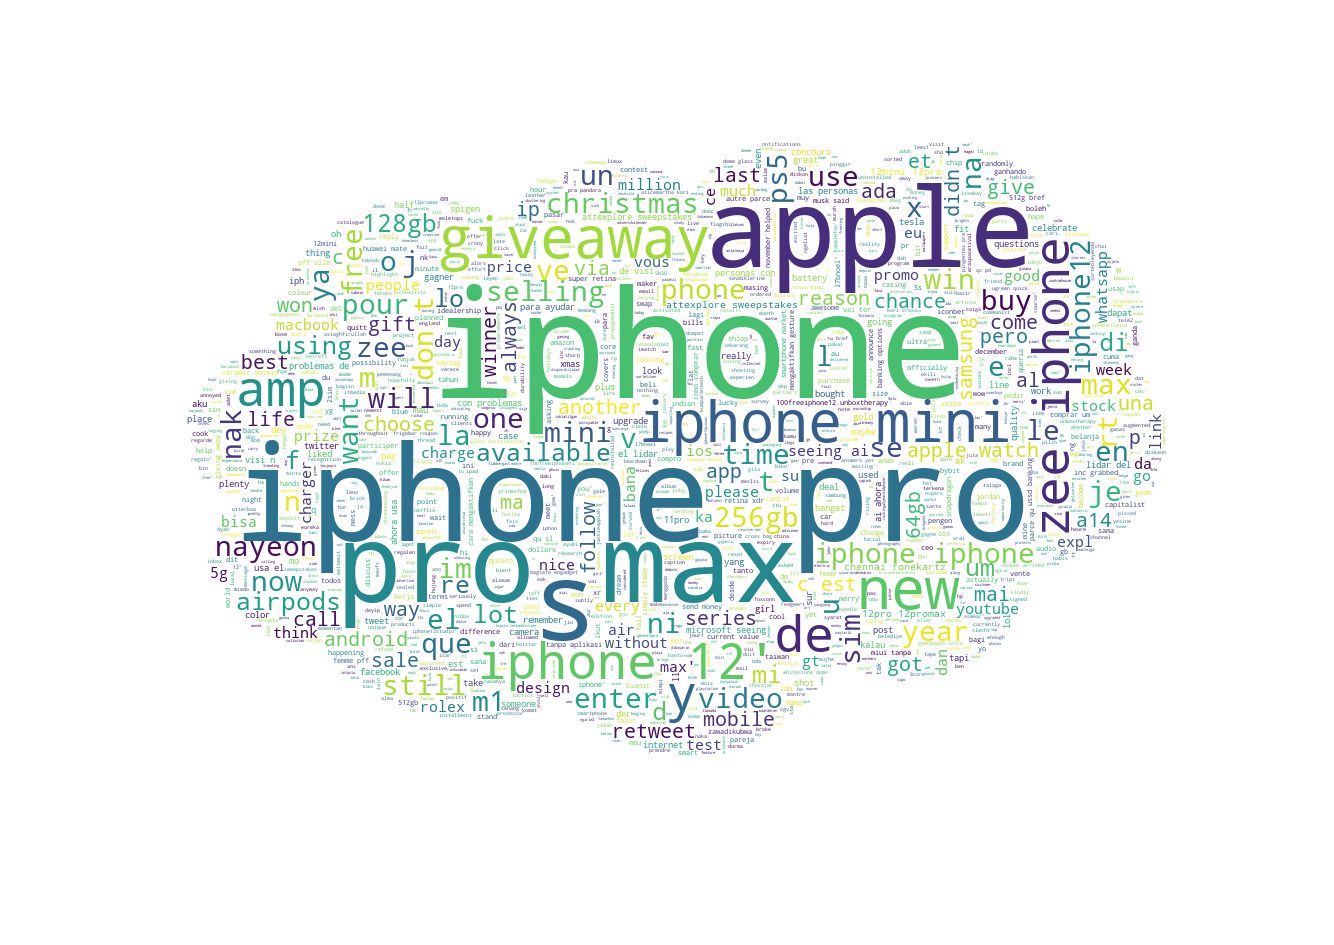

In [429]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


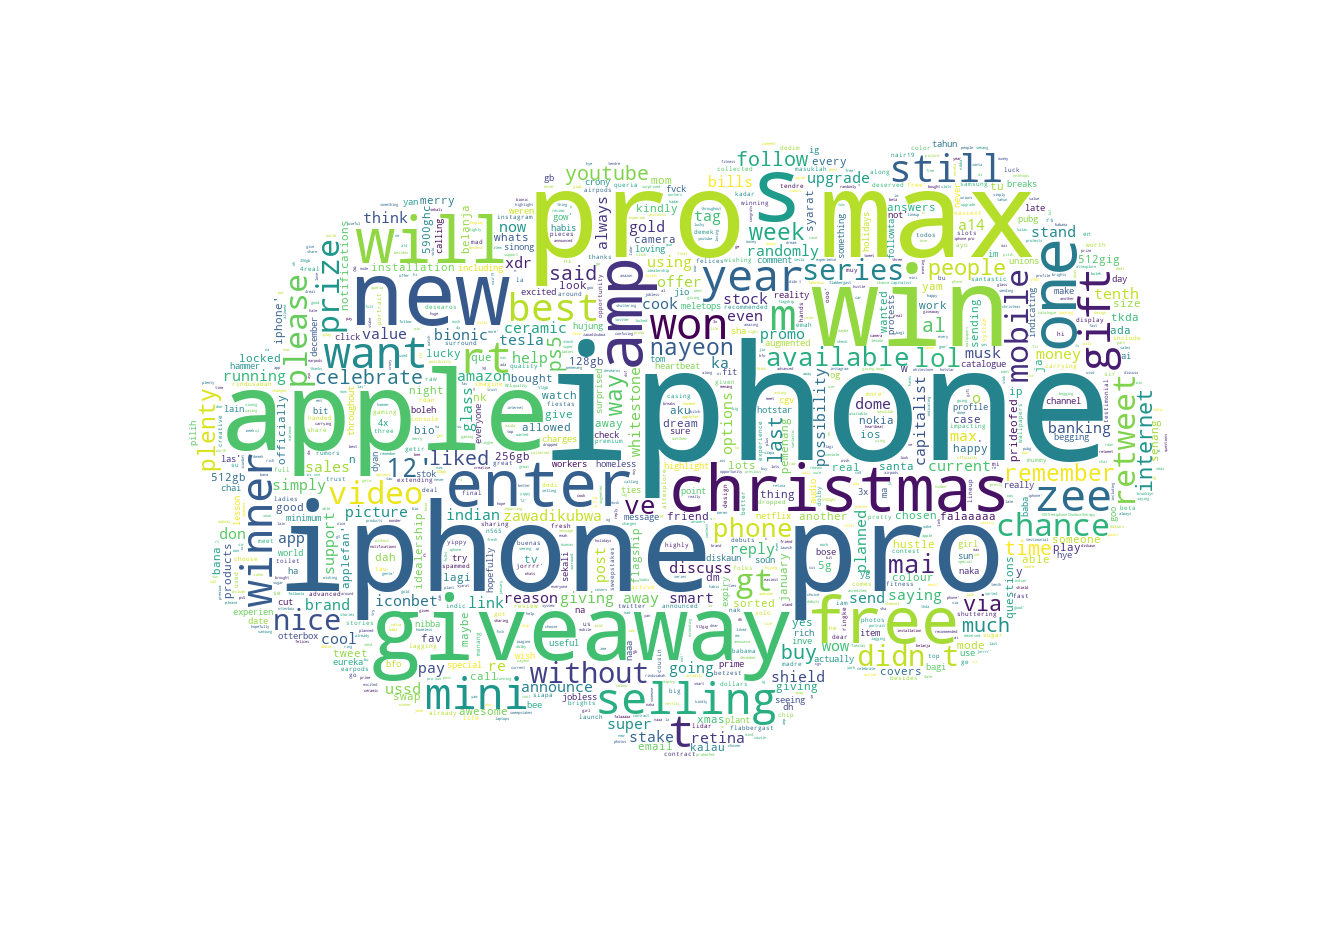

In [430]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


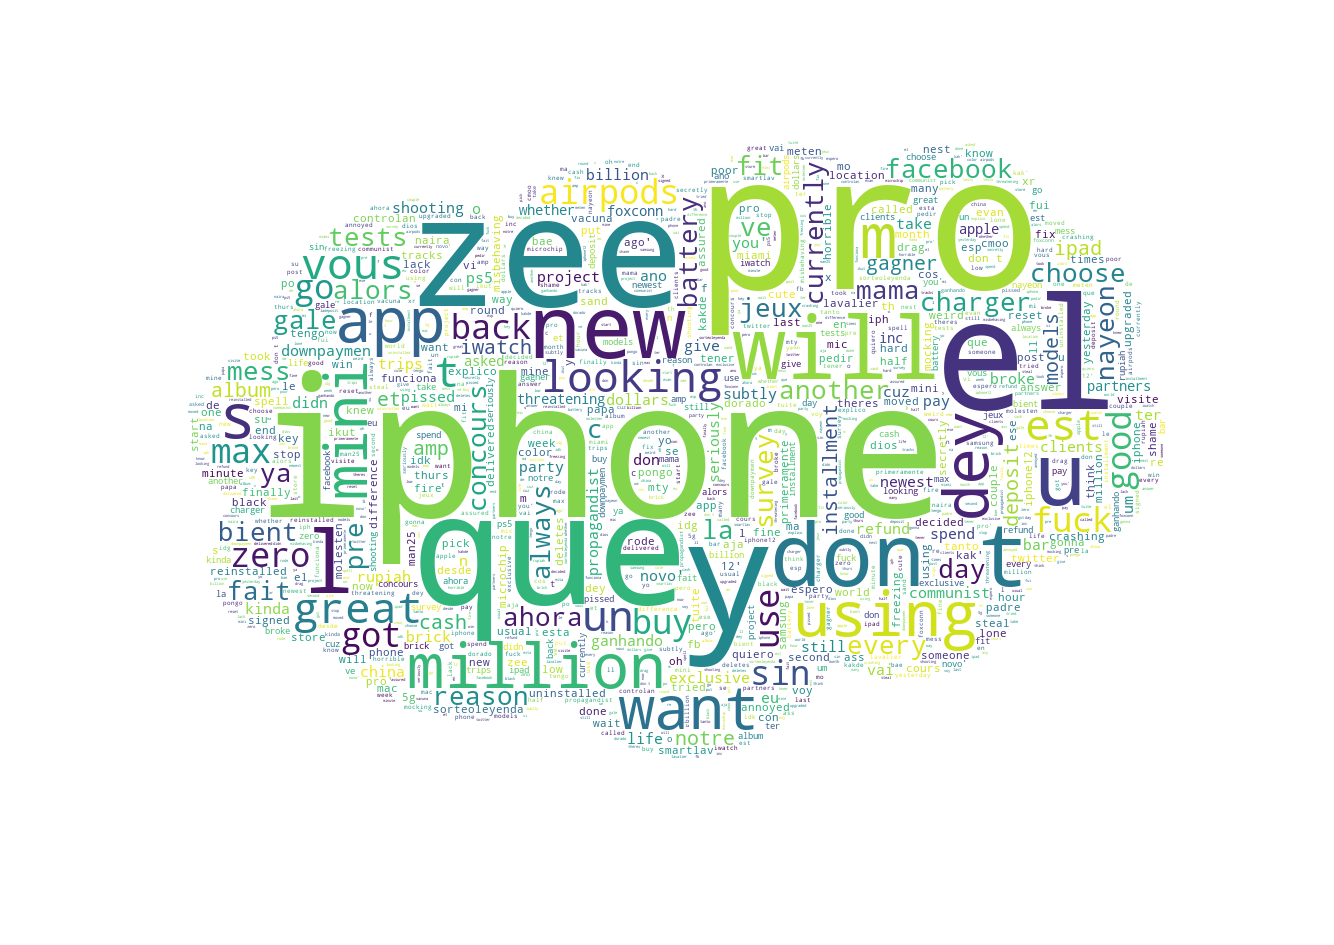

In [431]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)


Word Cloud Saved Successfully


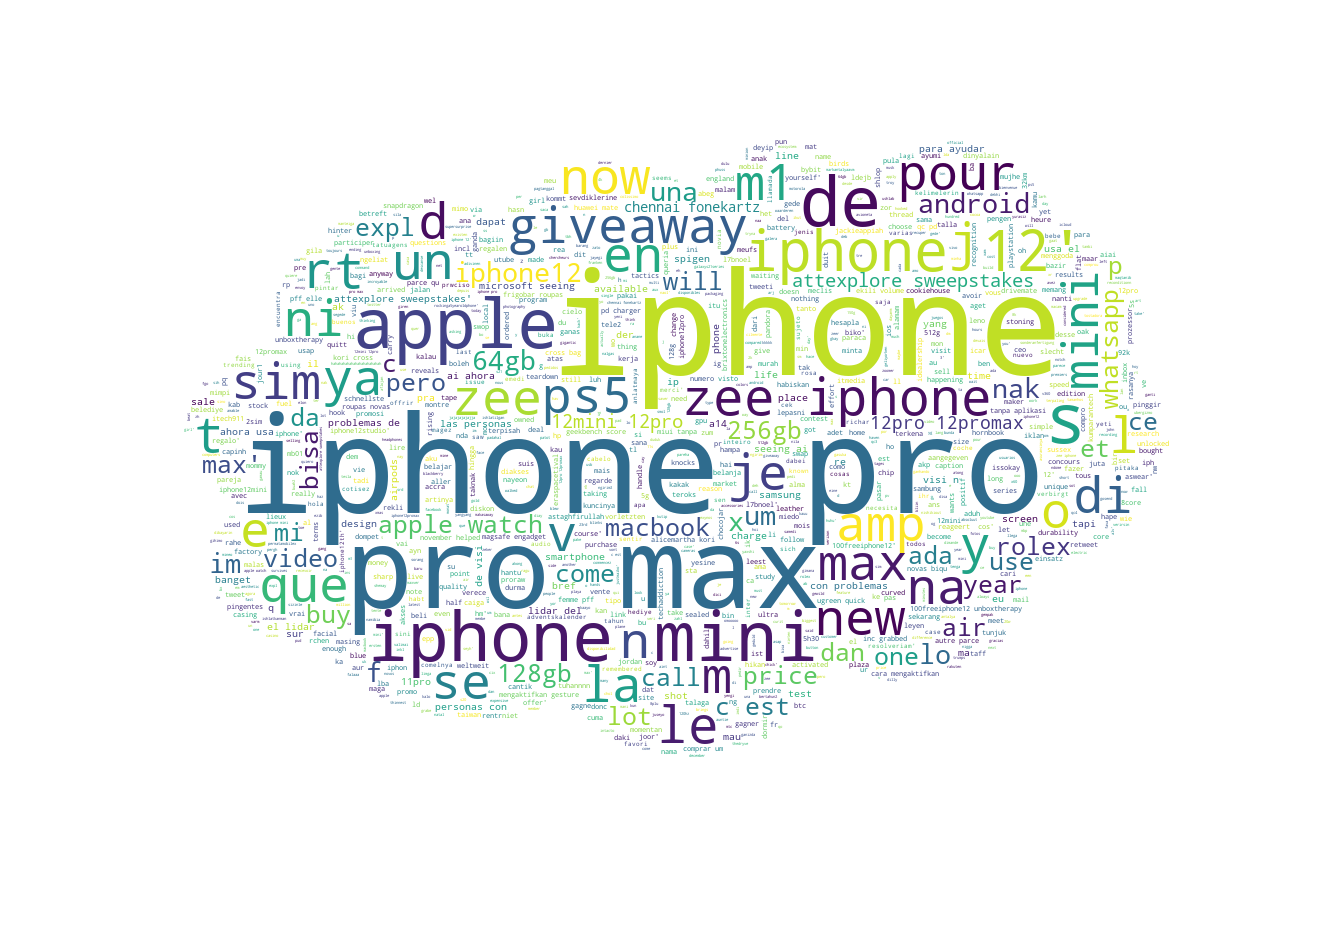

In [432]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [433]:
#Calculating tweet's length and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [434]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,94.44
neutral,73.50
positive,93.95


In [435]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,19.00
neutral,10.76
positive,16.84


In [436]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [437]:
#Applying tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [438]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [439]:
#Applying Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [440]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [441]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @srkninci: 2020 zor bir yıldı.\n\nYılbaşınd...,2020 zor bir y ld y lba nda ekili le 2 a...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,127,28,zor bir y ld y lba nda ekili le adet g...,"[, zor, bir, y, ld, y, lba, nda, ekili, le, ad...","[, zor, bir, ld, lba, nda, ekili, le, adet, gb...","[, zor, bir, ld, lba, nda, ekili, le, adet, gb..."
1,RT @chirawitchris: #แจกฟรี Iphone 12 Pro Max ส...,iphone 12 pro max 128g 1 ...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,122,6,iphone pro max g ...,"[, iphone, pro, max, g, ]","[, iphone, pro, max, g, ]","[, iphon, pro, max, g, ]"
2,RT @LewLater: iPhone 12 Teardown Reveals Apple...,iphone 12 teardown reveals apple s tactics ...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,51,7,iphone teardown reveals apple s tactics,"[, iphone, teardown, reveals, apple, s, tactic...","[, iphone, teardown, reveals, apple, tactics, ]","[, iphon, teardown, reveal, appl, tactic, ]"
3,RT @TheBubSauce: Enter our Gold iPhone 12 Pro ...,enter our gold iphone 12 pro 512gb giveaway b...,-0.5,0.5,positive,0.0,0.858,0.142,0.5859,124,24,enter our gold iphone pro gb giveaway by goi...,"[, enter, our, gold, iphone, pro, gb, giveaway...","[, enter, gold, iphone, pro, gb, giveaway, goi...","[, enter, gold, iphon, pro, gb, giveaway, go, ..."
4,@TechnicalGuruji Iphone 12 ka Giveaway kab hai...,iphone 12 ka giveaway kab hai aur wo mu...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,67,14,iphone ka giveaway kab hai aur wo mujh...,"[, iphone, ka, giveaway, kab, hai, aur, wo, mu...","[, iphone, ka, giveaway, kab, hai, aur, wo, mu...","[, iphon, ka, giveaway, kab, hai, aur, wo, muj..."


In [442]:
#Applying Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

435 Number of reviews has 1482 words


In [443]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aangegeven,ab,abeg,abl,absoluut,accessori,accra,acreditem,activ,...,zato,zawadikubwa,zee,zeer,zeker,zero,zh,zoomer,zor,zum
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [444]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
iphon,444
pro,153
max,80
mini,41
appl,37
zee,37
de,26
new,23
giveaway,22
gb,21


In [445]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [446]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('iphone 12', 359),
 ('12 pro', 123),
 ('pro max', 72),
 ('12 mini', 28),
 ('zee iphone', 22),
 ('12 iphone', 9),
 ('attexplore sweepstakes', 9),
 ('new iphone', 9),
 ('max attexplore', 8),
 ('iphone 11', 8),
 ('apple iphone', 7),
 ('12 giveaway', 6),
 ('apple watch', 6),
 ('buy iphone', 6),
 ('el iphone', 6),
 ('12 12pro', 5),
 ('seeing ai', 5),
 ('chance win', 5),
 ('del iphone', 5),
 ('want iphone', 4)]

In [447]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('iphone 12 pro', 117),
 ('12 pro max', 69),
 ('iphone 12 mini', 28),
 ('zee iphone 12', 22),
 ('new iphone 12', 9),
 ('pro max attexplore', 8),
 ('max attexplore sweepstakes', 8),
 ('iphone 12 iphone', 7),
 ('12 iphone 12', 7),
 ('iphone 12 giveaway', 6),
 ('apple iphone 12', 6),
 ('el iphone 12', 6),
 ('buy iphone 12', 5),
 ('del iphone 12', 5),
 ('want iphone 12', 4),
 ('100 iphone 12', 4),
 ('rolex iphone 12', 4),
 ('pro max ps5', 4),
 ('vs iphone 12', 4),
 ('um iphone 12', 4)]